In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def predict(hypothesis, theta, X):
    return hypothesis(theta, X)

In [3]:
def hypothesis(theta, X):
    '''
    Returns a vertical vector of shape (m,1)
    Here theta is a vertical vector of shape (n+1,1) and X is a matrix of shape (m, n+1)
    (m, n+1) @ (n+1,1) -> (m,1)
    '''
    return X@theta

In [4]:
def cost(hypothesis, theta, X, y):
    '''
    Returns a single number that is the cost.
    Here theta is a vertical vector of shape (n+1,1), X is a matrix of shape (m, n+1) and y is a vertical vector of (m,1)
    '''
    m = len(y)
    diff = hypothesis(theta, X) - y
    J = np.sum(diff.T @ diff)/(2*m) #vectorised calculation
    return J

In [5]:
def gradient(hypothesis, theta, X, y):
    '''
    Returns a vertical vector of (n+1,1) which represents the gradient of the cost function.
    Here theta is a vertical vector of shape (n+1,1), X is a matrix of shape (m, n+1) and y is a vertical vector of (m,1)
    '''
    m = len(y)
    grad = (X.T @ (hypothesis(theta, X) - y))/m
    return grad

In [6]:
def fit(gradient, hypothesis, theta, X, y, learning_rate, threshold):
    J_prev = 1
    J = 0
    iteration = 0

    while abs(J_prev - J) > threshold:
        J_prev = J
        J = cost(hypothesis, theta, X, y)
        theta = theta - learning_rate * gradient(hypothesis, theta, X, y)
        print('Cost for iteration {}: {}'.format(iteration, J))
        iteration += 1

    return theta

In [7]:
def prep(df):
    dat = np.matrix(df)
    X = dat[:,:-1]
    y = dat[:,-1]

    m, n = np.shape(X)

    ones = np.matrix(np.ones(m)).T
    X = np.concatenate([ones,X], axis = 1)
    theta = np.matrix(np.zeros(n+1)).T
    return theta, X, y

In [8]:
number_of_examples = 50
points = np.matrix([np.array([i for i in range(number_of_examples)]), np.array([0.4*i+3+6*np.random.random() for i in range(number_of_examples)])]).T
df = pd.DataFrame(points, columns = ['X', 'y'])

In [9]:
df

,X,y
0,0.0,5.019250
1,1.0,4.825209
2,2.0,6.356514
3,3.0,8.612691
4,4.0,8.729342
5,5.0,9.855809
6,6.0,9.327743
7,7.0,11.259945
8,8.0,10.141556
9,9.0,11.387123


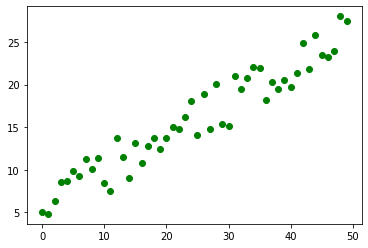

In [10]:
plt.plot(df['X'],df['y'], 'go')

## Train Test split

In [11]:
def train_test_split(X, y, test_size = 0.2):
    df = np.matrix(df)
    m = len(df)
    test_lim = int(test_size*m)
    X_test, X_train, y_test, y_train = X[:test_lim,0], X[test_lim:,0], y[:test_lim:,1], y[test_lim:,1]
    return X_train, X_test, y_train, y_test

In [12]:
theta, X, y = prep(df)

In [13]:
theta = fit(gradient, hypothesis, theta, X, y, learning_rate = 0.0008, threshold = 1e-5) # TAKES ABOUT LONGER THAN A MINUTE TO TRAIN

Cost for iteration 0: 145.4145215527136
Cost for iteration 1: 23.75453769313102
Cost for iteration 2: 8.626657761106328
Cost for iteration 3: 6.744010989612198
Cost for iteration 4: 6.508156720240702
Cost for iteration 5: 6.477050379889323
Cost for iteration 6: 6.471401267753703
Cost for iteration 7: 6.468918009228661
Cost for iteration 8: 6.466829097331588
Cost for iteration 9: 6.46478994780142
Cost for iteration 10: 6.4627577178649
Cost for iteration 11: 6.46072708053984
Cost for iteration 12: 6.458697373216267
Cost for iteration 13: 6.456668513209912
Cost for iteration 14: 6.454640489939336
Cost for iteration 15: 6.452613301787827
Cost for iteration 16: 6.450586948253387
Cost for iteration 17: 6.448561428972739
Cost for iteration 18: 6.446536743599971
Cost for iteration 19: 6.444512891791463
Cost for iteration 20: 6.4424898732039955
Cost for iteration 21: 6.440467687494528
Cost for iteration 22: 6.438446334320162
Cost for iteration 23: 6.436425813338141
Cost for iteration 24: 6.4344

In [14]:
theta

matrix([[5.78482316],
        [0.41088628]])

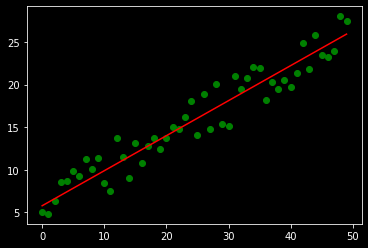

In [15]:
#PLOT
plt.style.use('dark_background')
xplt = np.array([i for i in range(number_of_examples)])
slope = np.sum(theta[1])
intercept = np.sum(theta[0])
yplt = slope*xplt + intercept
plt.plot(df['X'],df['y'], 'go')
plt.plot(xplt, yplt, 'r-')